In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
def display_topic_keywords(data, num_topics, num_top_keywords):
    # Membaca data
    data = pd.read_csv(data)
    
    # Membuat vektor TF-IDF
    vectorizer = TfidfVectorizer(min_df=1,
                                 norm='l2',
                                 smooth_idf=True,
                                 use_idf=True,
                                 ngram_range=(1,2))
    X = vectorizer.fit_transform(data['content_clean'])

    # Membuat model LSA dengan jumlah topik yang diminta
    lsa_model = TruncatedSVD(n_components=num_topics)
    lsa_topic_matrix = lsa_model.fit_transform(X)

    # Mendapatkan kata-kata teratas untuk setiap topik
    terms = vectorizer.get_feature_names_out()
    top_terms_per_topic = []
    for i, topic in enumerate(lsa_model.components_):
        top_terms = [terms[j] for j in topic.argsort()[-num_top_keywords:]]
        print(f"Topik {i+1}: {', '.join(top_terms)}")
        top_terms_per_topic.append(top_terms)

    # Word Cloud
    plt.figure(figsize=(14, 8))
    for i in range(num_topics):
        plt.subplot(2, 5, i+1)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_terms_per_topic[i]))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topik {i+1}')
        plt.axis('off')
    plt.show()

    # Bar Plot Topik Kata untuk LSA
    plt.figure(figsize=(12, 8))
    for i in range(num_topics):
        plt.subplot(2, 5, i+1)
        top_terms = [terms[j] for j in lsa_model.components_[i].argsort()[-num_top_keywords:]]
        top_weights = sorted(lsa_model.components_[i])[-num_top_keywords:]
        sns.barplot(x=top_terms, y=top_weights)
        plt.title(f'Topik {i+1}')
        plt.xlabel('Kata')
        plt.ylabel('Bobot')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Topik 1: capres, mahfud, mk, partai, debat, presiden, cawapres, ganjar, prabowo, gibran


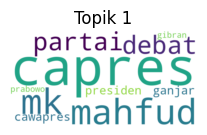

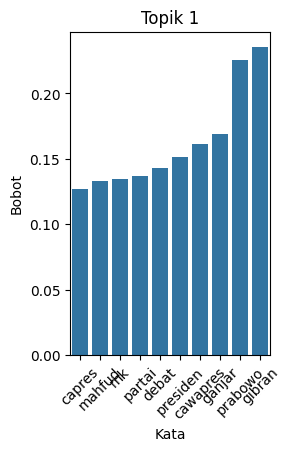

In [3]:
# Menggunakan fungsi dengan inputan jumlah topik dan jumlah kata kunci untuk setiap topik
display_topic_keywords('data_pemilu.csv', num_topics=1, num_top_keywords=10)

Topik 1: capres, mahfud, mk, partai, debat, presiden, cawapres, ganjar, prabowo, gibran
Topik 2: mahkamah, usia, usman, anwar usman, konstitusi, anwar, mkmk, hakim, putusan, mk
Topik 3: limpo, yasin, metro jaya, metro, korupsi, syl, tersangka, syahrul, firli, kpk


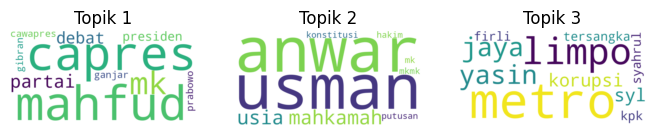

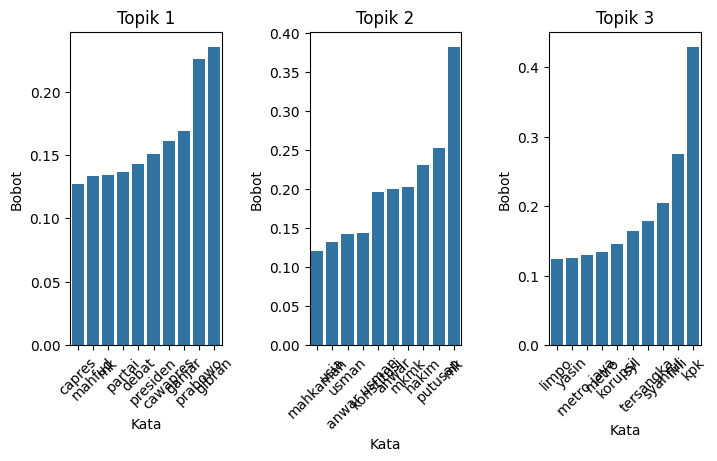

In [4]:
# Menggunakan fungsi dengan inputan jumlah topik dan jumlah kata kunci untuk setiap topik
display_topic_keywords('data_pemilu.csv', num_topics=3, num_top_keywords=10)

Topik 1: presiden, cawapres, ganjar, prabowo, gibran
Topik 2: anwar, mkmk, hakim, putusan, mk
Topik 3: syl, tersangka, syahrul, firli, kpk
Topik 4: cak imin, imin, anies, kpu, debat
Topik 5: mahfud, anies, persen, ganjar, survei


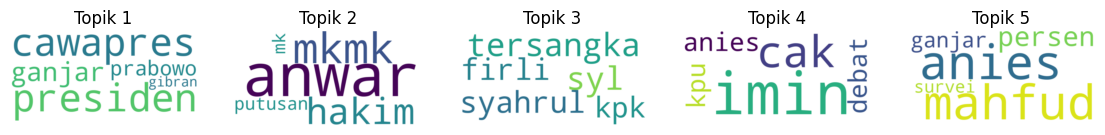

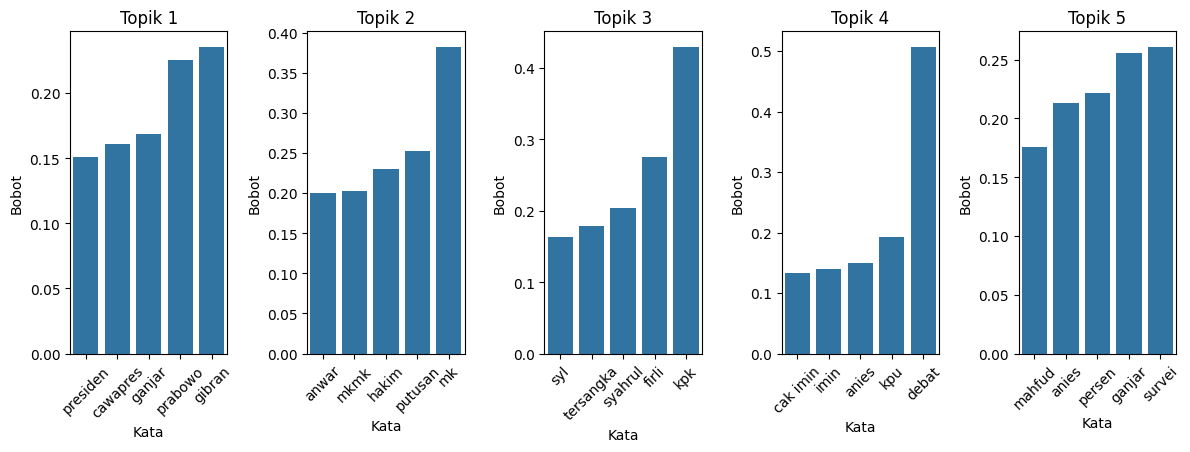

In [5]:
# Menggunakan fungsi dengan inputan jumlah topik dan jumlah kata kunci untuk setiap topik
display_topic_keywords('data_pemilu.csv', num_topics=5, num_top_keywords=5)